In [3]:
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import os.path
import time
# sys.path.append('../')

import pandas
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
#import gcb_iav
#from annualmean import annualmean
#from integrate_CO2flux import integrate_CO2flux
from matplotlib import cm
from numpy import genfromtxt #loadtxt
from matplotlib.ticker import MultipleLocator

import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import calendar
import matplotlib.patches as mpatches

#-------------------------------------------
# settings for plots:

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 20}

# plt.rc('font', **font)

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
#####################################
# some more settings

xax = np.arange(0.,361.,1)
yax = np.arange(-89.5,90.5,1)
lon, lat = np.meshgrid(xax,yax, indexing='ij')
#---------------

firstyear=1958
lastyear=2021 # always one more than actually analysed

#define time range for nc data 
gcb_time = np.arange(firstyear,lastyear-1./24,step=1./12)
tsteps = (lastyear-firstyear)*12
gcb_years = np.arange(firstyear,lastyear)


#-------------------------
# file names and location (for reading)
netcdf_name_A_models = 'gcb_load_A_2021_models.nc'
netcdf_name_B_models = 'gcb_load_B_2021_models.nc'
netcdf_name_C_models = 'gcb_load_C_2021_models.nc'


saving_dir = '/work/ollie/jhauck/gcp2018/py_recom/GCB/Output/2021/'

# define models
models = ('CESM-ETH','FESOM2-REcoM','CNRM','IPSL','PlankTOM','NorESM','MOM6-COBALT','MPI') #### 'CESM-ETH','CSIRO','MPI',
mod = ('cesm','fesom2','cnrm','ipsl','planktom','noresm','princeton','mpi') #### 'cesm', 'mpi','csiro',

#-------------------------------
netcdf_name_dataprod = 'gcb_load_A_2021_dataprod.nc'


obs = ['Roedenbeck','Landschuetzer','CMEMS','GRaCER','Watson','Iida','Zeng','CSIR']#,
obs_short_names = ['roeden','land','cmems','gracer','watson','iida','zeng','csir',]
#-------------------------------
## for saving:

#-------------------------
# file names and location (for reading)
netcdf_name_attr = 'gcb2021_ocean_maps_v0.nc'
delete_old_netcdf = True

#-------------------------
# setup projection
projection = ccrs.PlateCarree()


In [5]:
# load data, sim A

print('\n loading '+saving_dir+netcdf_name_A_models+'\n Variables:\n')
gcb_data = Dataset(saving_dir+netcdf_name_A_models)
        
for vars in gcb_data.variables: #read in variables ####einlesen als vars_reloaded!!!
    exec(vars + ' = gcb_data["' + vars + '"][:]')
    exec('print(vars, np.shape(vars))')       
        


 loading /work/ollie/jhauck/gcp2018/py_recom/GCB/Output/2021/gcb_load_A_2021_models.nc
 Variables:

X ()
Y ()
T ()
area ()
WOA_seamask ()
TAKA_seamask400 ()
cesm_fgco2_1x1_A ()
cesm_sfco2_1x1_A ()
fesom2_fgco2_1x1_A ()
fesom2_sfco2_1x1_A ()
cnrm_fgco2_1x1_A ()
cnrm_sfco2_1x1_A ()
ipsl_fgco2_1x1_A ()
ipsl_sfco2_1x1_A ()
planktom_fgco2_1x1_A ()
planktom_sfco2_1x1_A ()
noresm_fgco2_1x1_A ()
noresm_sfco2_1x1_A ()
princeton_fgco2_1x1_A ()
princeton_sfco2_1x1_A ()
mpi_fgco2_1x1_A ()
mpi_sfco2_1x1_A ()


(180, 360)
(180, 360)


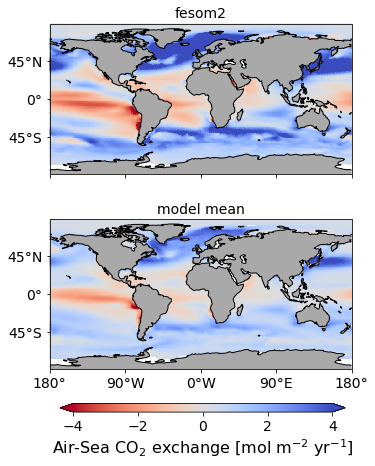

In [7]:
cmap = cm.coolwarm_r
#cmap.set_bad('white',1.)

#quickly check fields

#### fgco2

#variables = fesom.__dict__.keys()
#print variables
fgco2_mmm_A= np.zeros([180,360])
print(np.shape(fgco2_mmm_A))

#graphic models
#fig_mod = plt.figure(1,figsize=(10,10))

fig, ax = plt.subplots(
            2,
            1,
            subplot_kw=dict(projection=ccrs.PlateCarree()),
            constrained_layout=False,
            figsize=(6,6),sharex=True,sharey=True,
        )

ax = ax.flatten()

imodel = 1
model_short = mod[imodel]
x = model_short + '_fgco2_1x1_A[-120:,:,:]'
x = eval(x)
x_m = np.ma.array(x, mask=np.isnan(x))
x_m = np.nanmean(x_m,axis=0)
print(np.shape(x_m))
ax[0].pcolor(xax,yax,x_m*3600*24*365, vmin=-3, vmax=3, cmap=cmap)#vmin=np.nanmin(x), vmax=np.nanmax(x)) 
ax[0].set_title(model_short)
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='none', facecolor='darkgray')
ax[0].set_xticks([-180, -90, 0, 90, 180], crs=ccrs.PlateCarree())
ax[0].set_yticks([-90, -45, 0, 45, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[0].xaxis.set_major_formatter(lon_formatter)
ax[0].yaxis.set_major_formatter(lat_formatter)
ax[0].coastlines()

nn=0
for imodel in range(0,len(models)):
 #model = models[imodel]
 model_short = mod[imodel]
 x = model_short + '_fgco2_1x1_A[-120:,:,:]'
 x = eval(x)
 x_m = np.ma.array(x, mask=np.isnan(x))
 x_m = np.nanmean(x_m,axis=0)
 # adding up, counting numbers:
 fgco2_mmm_A = fgco2_mmm_A+x_m
 nn = nn+1
fgco2_mmm_A = fgco2_mmm_A /nn

image = ax[1].pcolor(xax,yax,fgco2_mmm_A*3600*24*365, vmin=-4, vmax=4, cmap=cmap)
ax[1].set_title('model mean')
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='none', facecolor='darkgray')
ax[1].set_xticks([-180, -90, 0, 90, 180], crs=ccrs.PlateCarree())
ax[1].set_yticks([-90, -45, 0, 45, 90], crs=ccrs.PlateCarree())
ax[1].coastlines()

# plt.colorbar()    
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.3, wspace=0.2)

cbar2_ax = fig.add_axes([0.2, 0.001, 0.66, 0.02])
cbar2 = fig.colorbar(image,
                    cax = cbar2_ax, 
                    orientation = 'horizontal',
                    pad=0.01, shrink=0.9, extend='both') 
cbar2.set_label('Air-Sea CO$_2$ exchange [mol m$^{-2}$ yr$^{-1}$]', fontsize=16)
cbar2.ax.tick_params(labelsize=14)

# ax[0].text(-0.12, 1.05, 'A', transform=ax[0].transAxes,
#             size=20, weight='bold')
# ax[1].text(-0.12, 1.05, 'B', transform=ax[1].transAxes,
#             size=20, weight='bold')

plt.savefig('Fig_CO2flux_map.png',transparent=False, dpi=300, bbox_inches='tight')
plt.show()

(180, 360)
(180, 360)


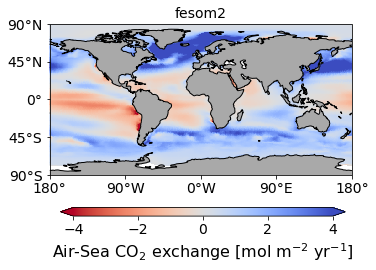

In [8]:
cmap = cm.coolwarm_r
#cmap.set_bad('white',1.)

#quickly check fields

#### fgco2

#variables = fesom.__dict__.keys()
#print variables
fgco2_mmm_A= np.zeros([180,360])
print(np.shape(fgco2_mmm_A))

#graphic models
#fig_mod = plt.figure(1,figsize=(10,10))

fig, ax = plt.subplots(
            1,
            1,
            subplot_kw=dict(projection=ccrs.PlateCarree()),
            constrained_layout=False,
            figsize=(6,3),sharex=True,sharey=True,
        )


imodel = 1
model_short = mod[imodel]
x = model_short + '_fgco2_1x1_A[-120:,:,:]'
x = eval(x)
x_m = np.ma.array(x, mask=np.isnan(x))
x_m = np.nanmean(x_m,axis=0) *3600*24*365
print(np.shape(x_m))
image = ax.pcolor(xax,yax,x_m, vmin=-4, vmax=4, cmap=cmap)#vmin=np.nanmin(x), vmax=np.nanmax(x)) 
ax.set_title(model_short)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='none', facecolor='darkgray')
ax.set_xticks([-180, -90, 0, 90, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -45, 0, 45, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.coastlines()

# plt.colorbar()    
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.10, right=0.95, hspace=0.3, wspace=0.2)

cbar2_ax = fig.add_axes([0.2, 0.01, 0.66, 0.04])
cbar2 = fig.colorbar(image,
                    cax = cbar2_ax, 
                    orientation = 'horizontal',
                    pad=0.01, shrink=0.9, extend='both') 
cbar2.set_label('Air-Sea CO$_2$ exchange [mol m$^{-2}$ yr$^{-1}$]', fontsize=16)
cbar2.ax.tick_params(labelsize=14)

plt.savefig('Fig_CO2flux_map_fesomonly.png',transparent=False, dpi=300, bbox_inches='tight')
plt.show()

(180, 360)


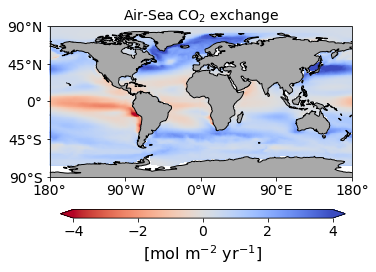

In [9]:
fgco2_mmm_A= np.zeros([180,360])
print(np.shape(fgco2_mmm_A))

nn=0
for imodel in range(0,len(models)):
 #model = models[imodel]
 model_short = mod[imodel]
 x = model_short + '_fgco2_1x1_A[-120:,:,:]'
 x = eval(x)
 x_m = np.ma.array(x, mask=np.isnan(x))
 x_m = np.nanmean(x_m,axis=0)
 # adding up, counting numbers:
 fgco2_mmm_A = fgco2_mmm_A+x_m
 nn = nn+1
fgco2_mmm_A = fgco2_mmm_A /nn
fgco2_mmm_A = fgco2_mmm_A *3600*24*365

fig, ax = plt.subplots(
            1,
            1,
            subplot_kw=dict(projection=ccrs.PlateCarree()),
            constrained_layout=False,
            figsize=(6,3),sharex=True,sharey=True,
        )

image = ax.pcolor(xax,yax,fgco2_mmm_A, vmin=-4, vmax=4, cmap=cmap)#vmin=np.nanmin(x), vmax=np.nanmax(x)) 
ax.set_title(model_short)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='none', facecolor='darkgray')
ax.set_xticks([-180, -90, 0, 90, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -45, 0, 45, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.coastlines()
ax.set_title('Air-Sea CO$_2$ exchange')

# plt.colorbar()    
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.10, right=0.95, hspace=0.3, wspace=0.2)

cbar2_ax = fig.add_axes([0.2, 0.01, 0.66, 0.04])
cbar2 = fig.colorbar(image,
                    cax = cbar2_ax, 
                    orientation = 'horizontal',
                    pad=0.01, shrink=0.9, extend='both') 
cbar2.set_label('[mol m$^{-2}$ yr$^{-1}$]', fontsize=16)
cbar2.ax.tick_params(labelsize=14)

plt.savefig('Fig_CO2flux_map_ensembleonly.png',transparent=False, dpi=300, bbox_inches='tight')
plt.show()